# **import requirements**

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# **Import Dataset, Set Timestamps, ...**

In [124]:
# store data from csv file to pandas dataframe, set index to datetime
filename = "/content/drive/MyDrive/Colab Notebooks/work/data/Inffeldgasse 18 Brunnenwasserzähler IN18 _ In2In18K1_S001_S40_P01-data-2023-04-05 14_09_43.csv"
data = pd.read_csv(filename, index_col="time")
data.index = pd.to_datetime(data.index)
data = data.rename(columns={'derivative': 'Water Consumption'})
WATER_CONSUMPTION = data.columns[0]


# print basic information about dataframe before changing timstamps
print("DATASET INFO BEFORE CHANGING FIRST AND LAST TIMESTAMPS: ")
print("Number of Records = ", data.shape[0])
print("First timestamp:", data.index[0])
print("Last timestamp:", data.index[-1])
print("-------------------------")
print("DATASET DESCRIPTION:")
print(data.describe())
print("\n\n")

# set first and last timestep
start_date = "2022-05-01 00:00:00"
end_date = "2023-04-05 14:00:00"
index_of_start_date = np.where(data.index == start_date)[0][0]
index_of_end_date = np.where(data.index == end_date)[0][0]
data = data[index_of_start_date : index_of_end_date]

# print basic information about dataframe
print("DATASET INFO AFTER CHANGING FIRST AND LAST TIMESTAMPS: ")
print("Number of Records = ", data.shape[0])
print("First timestamp:", data.index[0])
print("Last timestamp:", data.index[-1])
print("-------------------------")
print("DATASET DESCRIPTION:")
print(data.describe())

# print data head
print("-------------------------")
print("DATASET HEAD:")
print(data.head())

DATASET INFO BEFORE CHANGING FIRST AND LAST TIMESTAMPS: 
Number of Records =  45988
First timestamp: 2020-05-11 17:00:00
Last timestamp: 2023-04-05 14:00:00
-------------------------
DATASET DESCRIPTION:
       Water Consumption
count       45988.000000
mean            0.384088
std             1.137185
min             0.000000
25%             0.039100
50%             0.150000
75%             0.551000
max           220.000000



DATASET INFO AFTER CHANGING FIRST AND LAST TIMESTAMPS: 
Number of Records =  31165
First timestamp: 2022-05-01 00:00:00
Last timestamp: 2023-04-05 12:45:00
-------------------------
DATASET DESCRIPTION:
       Water Consumption
count       31165.000000
mean            0.178884
std             0.250573
min             0.000000
25%             0.039100
50%             0.078100
75%             0.242000
max             4.440000
-------------------------
DATASET HEAD:
                     Water Consumption
time                                  
2022-05-01 00:00:00   

# **Data Granularity**

**Hourly Water Consumption**

Text(0, 0.5, 'Consumption')

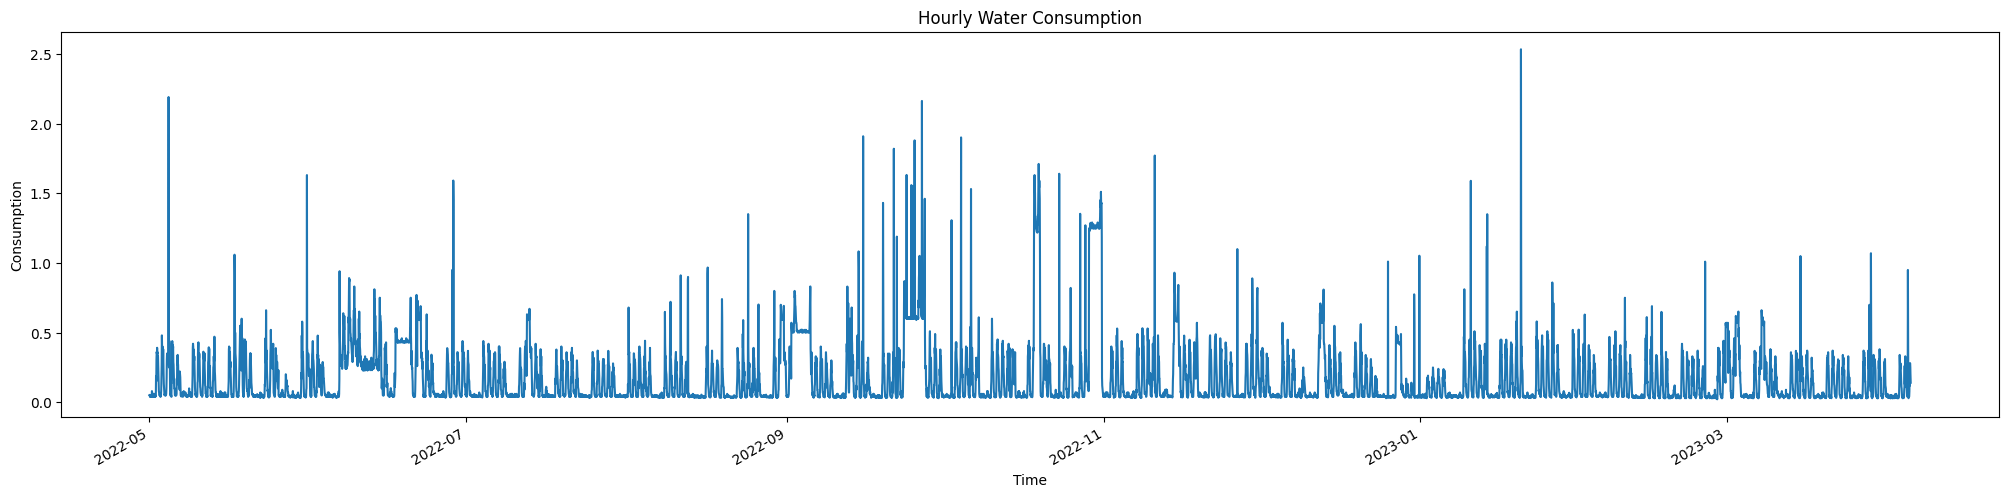

In [125]:
WIDTH = 25
HEIGHT = 5

index = data.index.to_period("H")
hourly_grouped_data = data.groupby(index).mean()
hourly_grouped_data["Hourly"] = index.drop_duplicates().to_timestamp()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(hourly_grouped_data["Hourly"], hourly_grouped_data[WATER_CONSUMPTION])
plt.title('Hourly Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

**Daily Water Consumption**

Text(0, 0.5, 'Consumption')

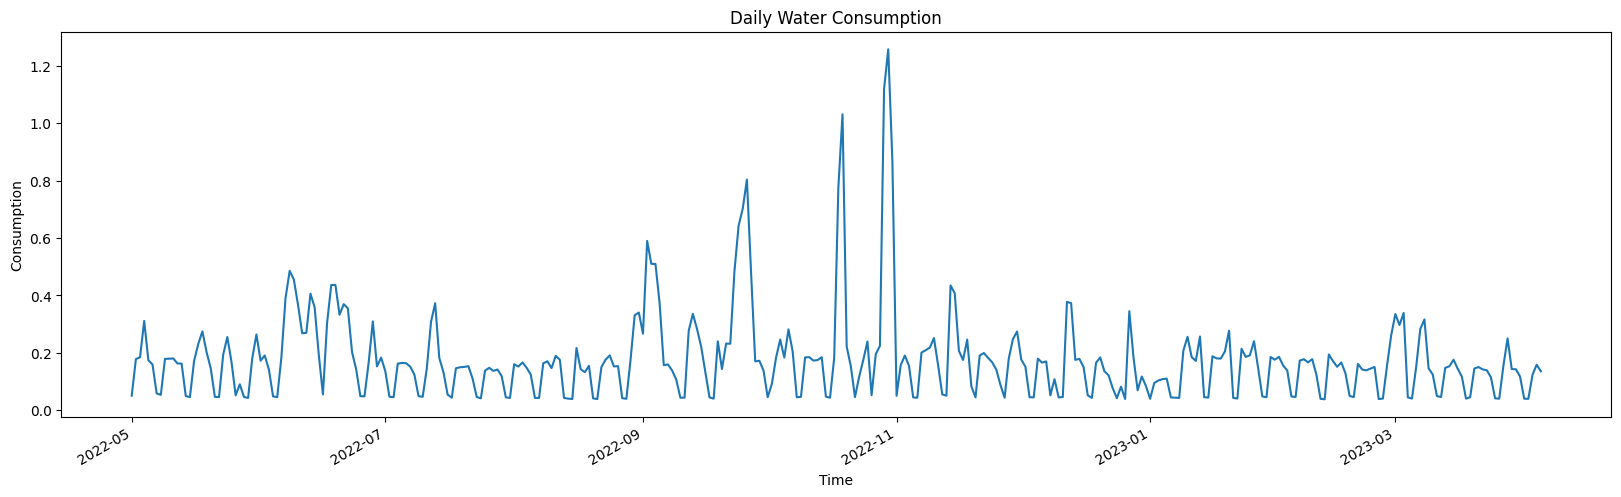

In [126]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("D")
daily_grouped_data = data.groupby(index).mean()
daily_grouped_data["Daily"] = index.drop_duplicates().to_timestamp()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(daily_grouped_data["Daily"], daily_grouped_data[WATER_CONSUMPTION])
plt.title('Daily Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

**Weekly Water Consumption**

Text(0, 0.5, 'Consumption')

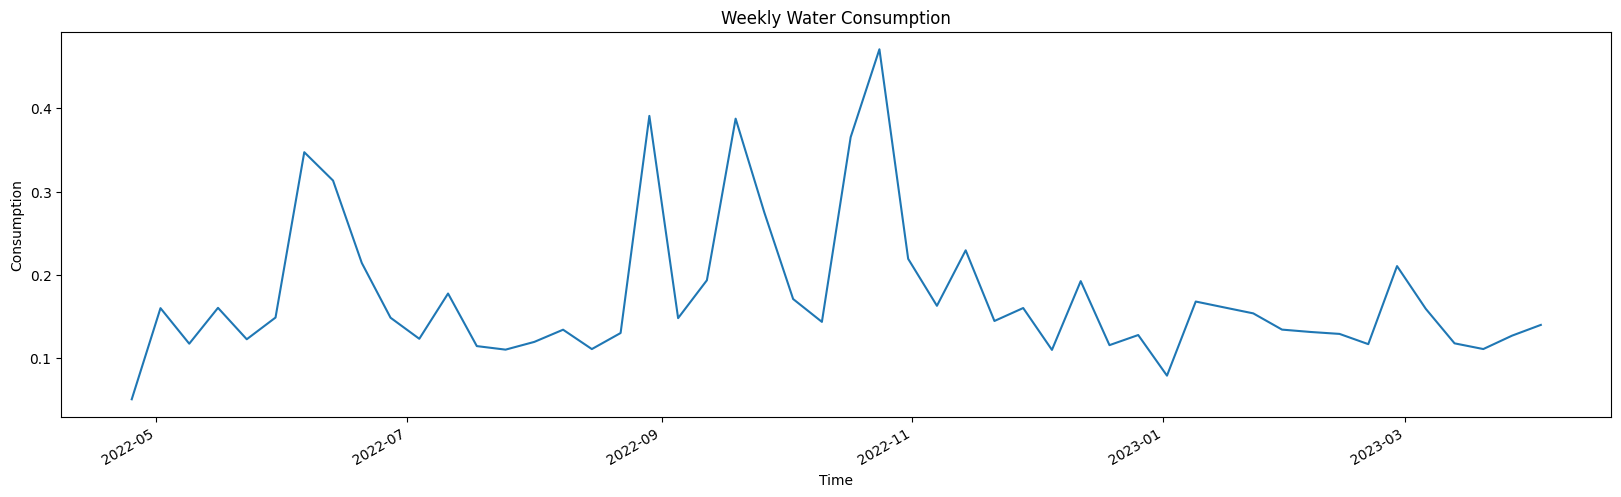

In [127]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("W")
weekly_grouped_data = data.groupby(index).mean()
weekly_grouped_data["Weekly"] = index.drop_duplicates().to_timestamp()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(weekly_grouped_data["Weekly"], weekly_grouped_data[WATER_CONSUMPTION])
plt.title('Weekly Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

**Monthly Water Consumption**

Text(0, 0.5, 'Consumption')

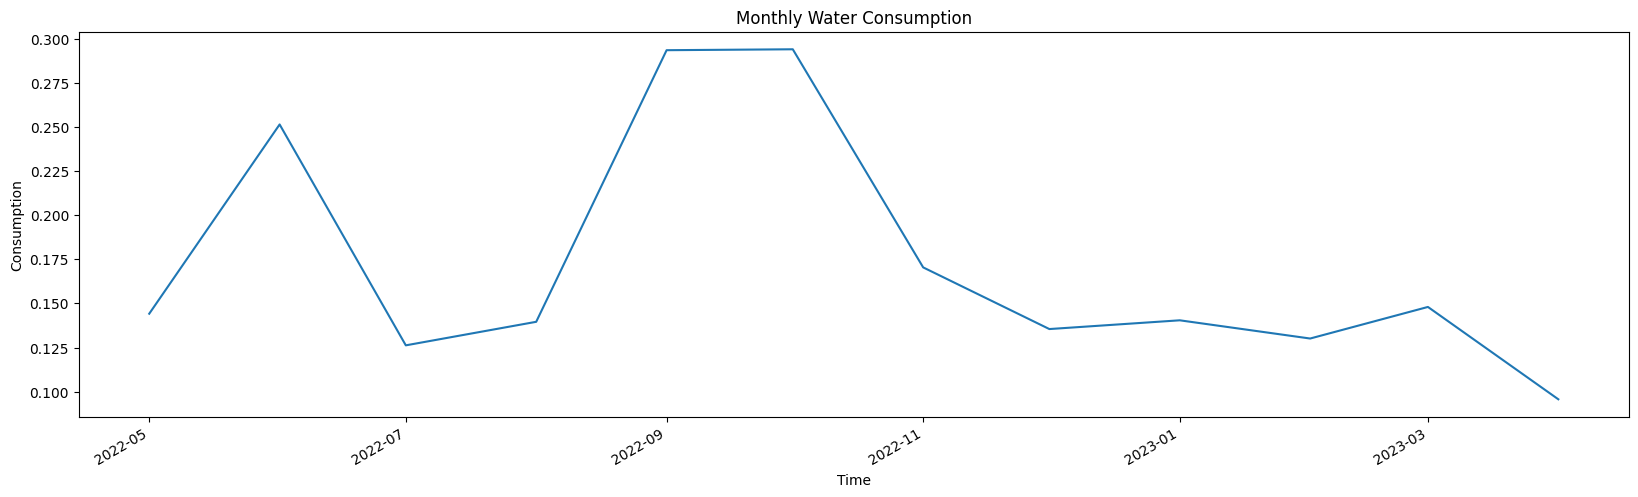

In [128]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("M")
monthly_grouped_data = data.groupby(index).mean()
monthly_grouped_data["Monthly"] = index.drop_duplicates().to_timestamp()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(monthly_grouped_data["Monthly"], monthly_grouped_data[WATER_CONSUMPTION])
plt.title('Monthly Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

# Overall Trend of Water Consumption

Text(0, 0.5, 'Consumption')

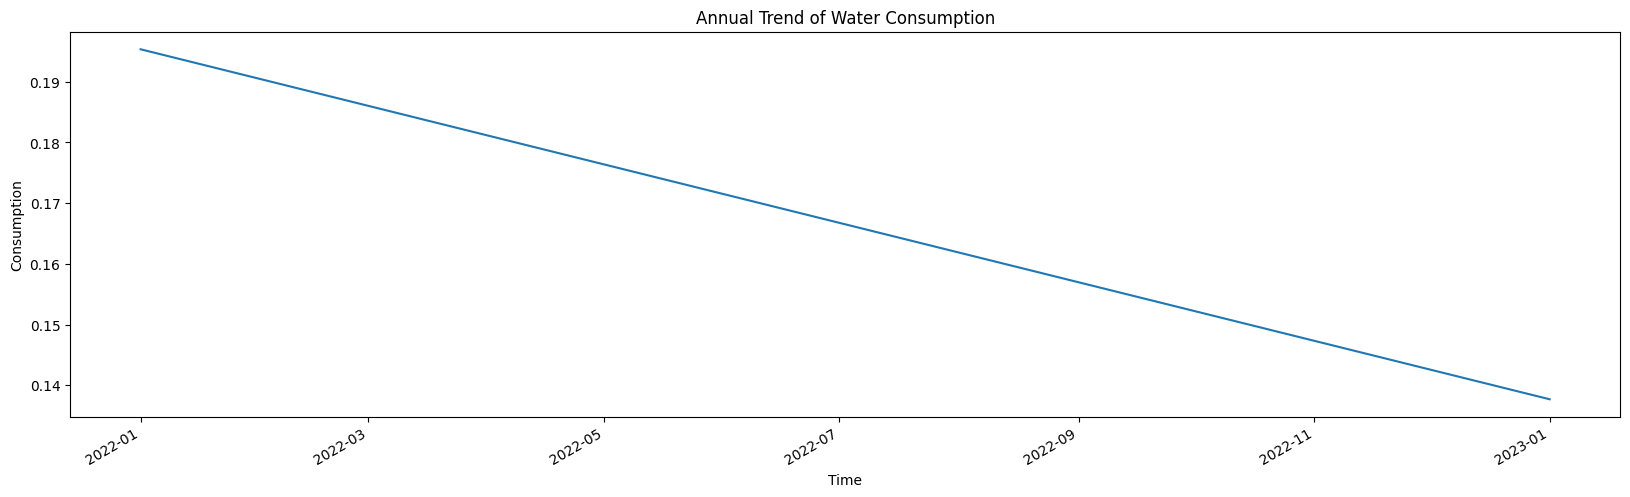

In [129]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("Y")
annual_grouped_data = data.groupby(index).mean()
annual_grouped_data["Annual"] = index.drop_duplicates().to_timestamp()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(annual_grouped_data["Annual"], annual_grouped_data[WATER_CONSUMPTION])
plt.title('Annual Trend of Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

# **Data Distribution**

**Hourly Distribution**

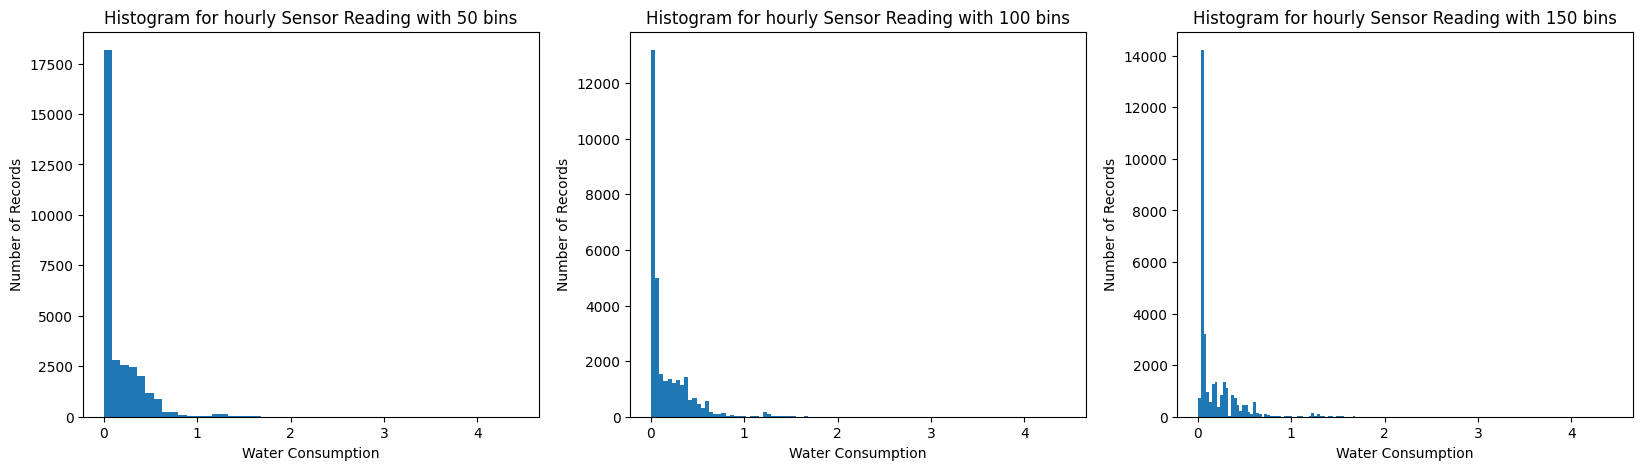

In [130]:
WIDTH = 20
HEIGHT = 5
number_of_bins = [50, 100, 150]
figure, axis = plt.subplots(1,3, figsize=(WIDTH, HEIGHT))
axis = axis.ravel()
for id, ax in enumerate(axis):
  ax.hist(data.values, bins=number_of_bins[id])
  ax.set_title('Histogram for hourly Sensor Reading with %d bins'%number_of_bins[id])
  ax.set_ylabel('Number of Records')
  ax.set_xlabel('Water Consumption')
plt.show()

# **Test for Stationarity - Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.**

if p value is below 0.05, time series is not stationary.

In [131]:
import statsmodels.api as st

p_value = st.tsa.stattools.kpss(data, regression='ct')[1]
print("p-value: %f"%p_value)

p-value: 0.010000


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# **Autocorrelation and Partial Autocorrelation**

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


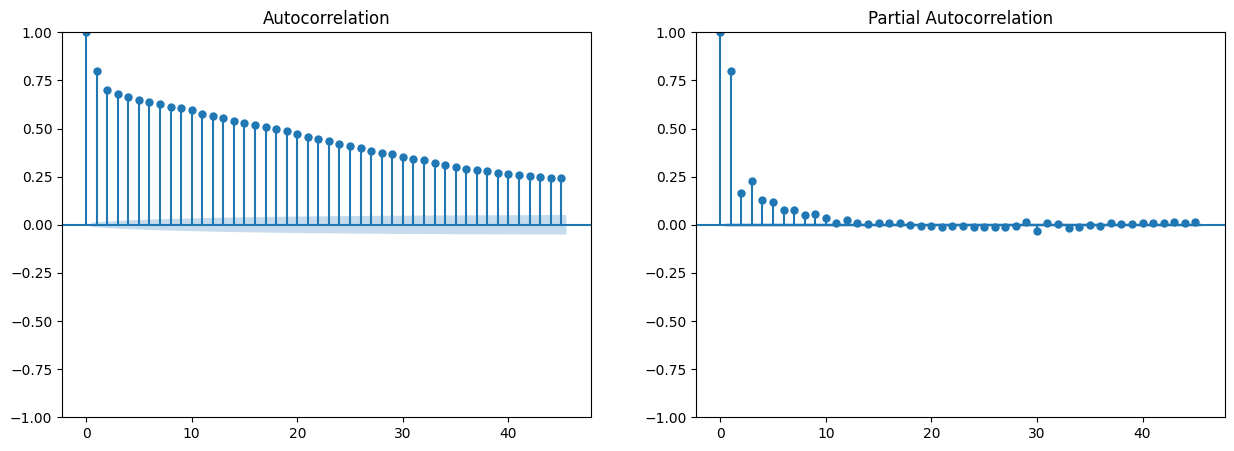

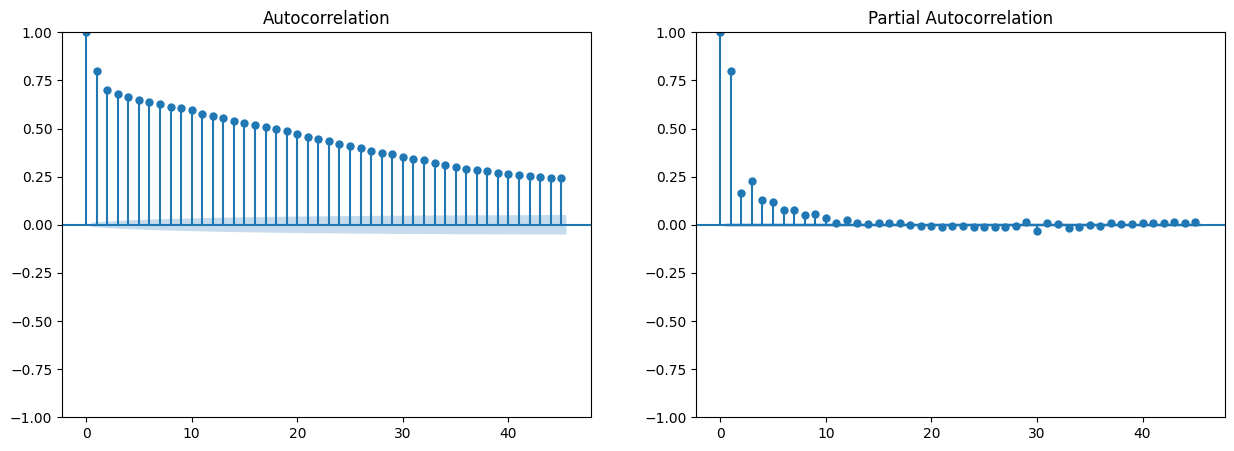

In [132]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

WIDTH = 15
HEIGHT = 5
figure, axis = plt.subplots(1,2, figsize=(WIDTH, HEIGHT))
plot_acf(data[WATER_CONSUMPTION], fft=True, ax=axis[0])
plot_pacf(data[WATER_CONSUMPTION], ax=axis[1])

# **Smoothing**

Smoothing daily

Text(0, 0.5, 'Consumption')

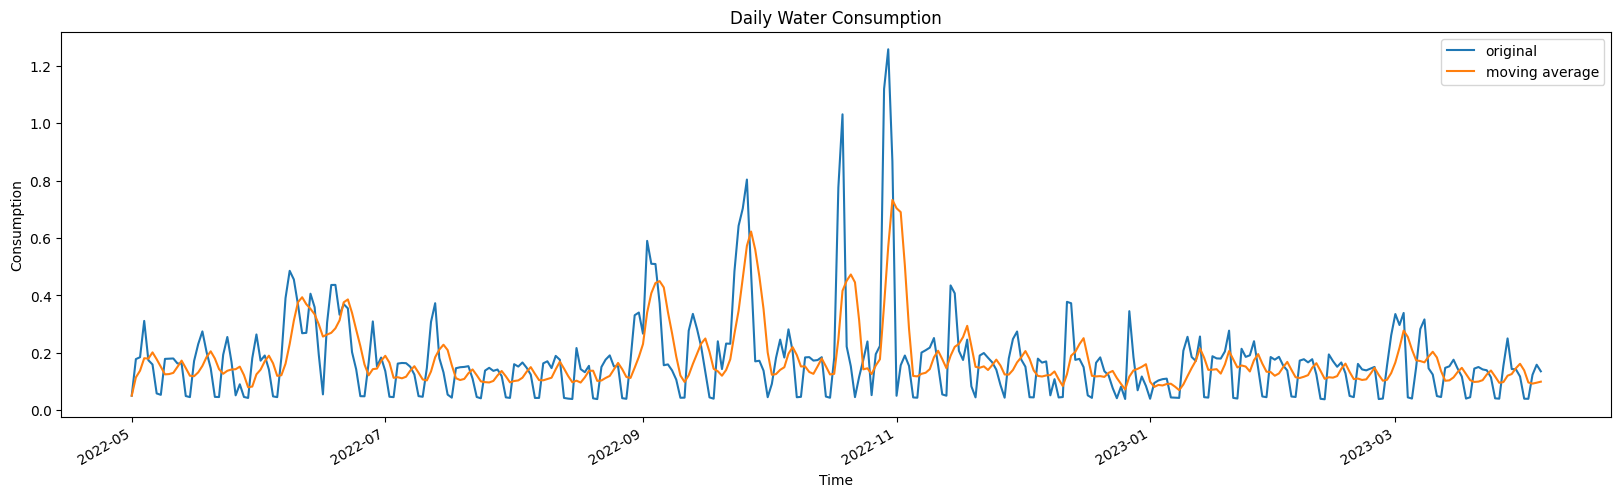

In [133]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("D")
daily_grouped_data = data.groupby(index).mean()
daily_grouped_data["Daily"] = index.drop_duplicates().to_timestamp()
daily_grouped_data = daily_grouped_data.set_index("Daily")
moving_average_data_daily = daily_grouped_data[WATER_CONSUMPTION].rolling("5D").mean()

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(daily_grouped_data.index, daily_grouped_data[WATER_CONSUMPTION], label="original")
plt.plot(daily_grouped_data.index, moving_average_data_daily, label="moving average")
plt.legend(loc="upper right")
plt.title('Daily Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

Smoothing hourly

Text(0, 0.5, 'Consumption')

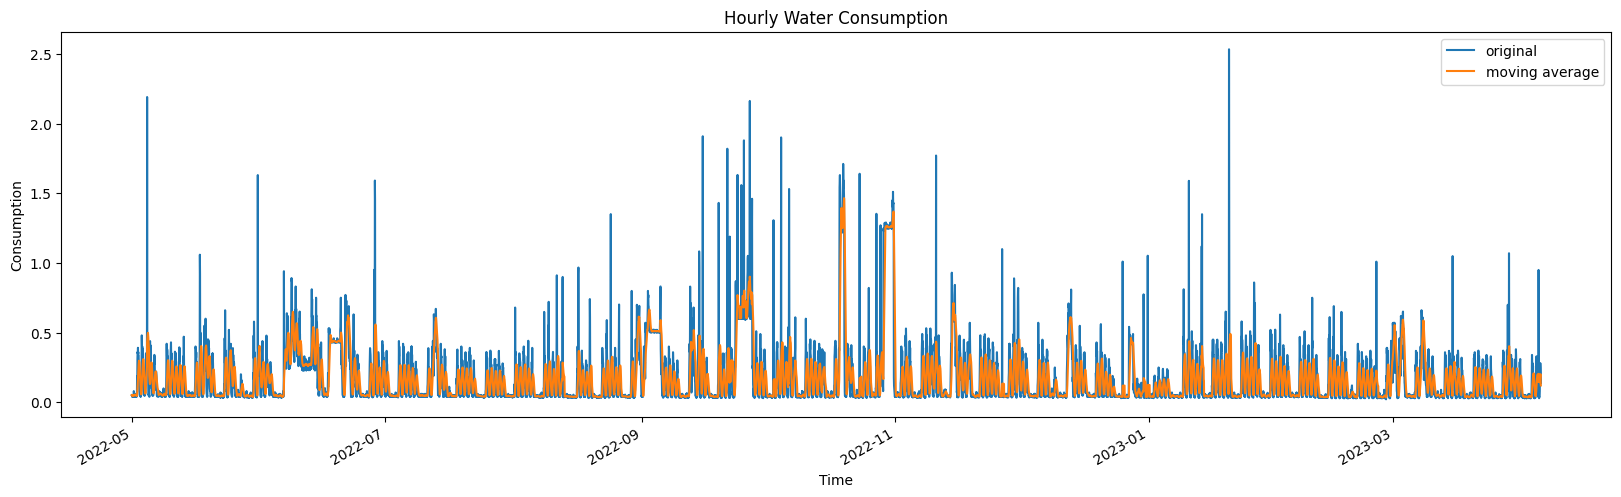

In [134]:
WIDTH = 20
HEIGHT = 5

index = data.index.to_period("H")
hourly_grouped_data = data.groupby(index).mean()
hourly_grouped_data["Hourly"] = index.drop_duplicates().to_timestamp()
moving_average_data_hourly = hourly_grouped_data[WATER_CONSUMPTION].rolling("12H").mean()
hourly_grouped_data = hourly_grouped_data.set_index("Hourly")


plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(hourly_grouped_data.index, hourly_grouped_data[WATER_CONSUMPTION], label="original")
plt.plot(hourly_grouped_data.index, moving_average_data_hourly, label="moving average")
plt.legend(loc="upper right")
plt.title('Hourly Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

# **Check for and remove outliers**

Text(0, 0.5, 'Consumption')

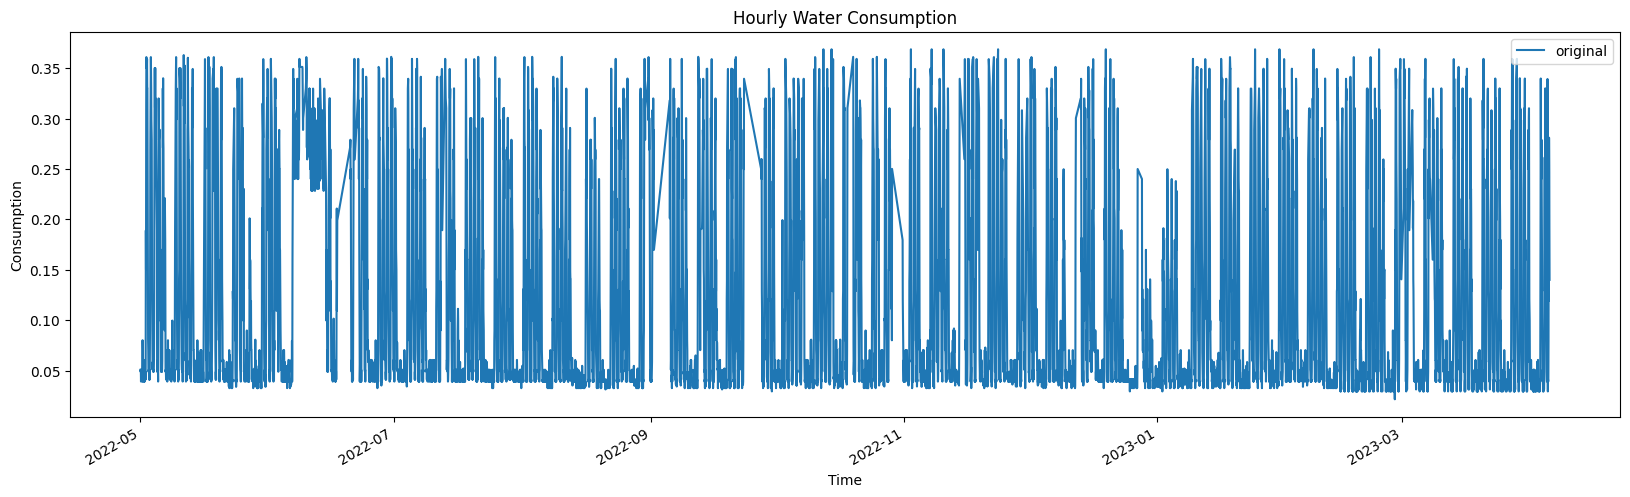

In [135]:
WIDTH = 20
HEIGHT = 5

Q1 = hourly_grouped_data.quantile(0.25)
Q3 = hourly_grouped_data.quantile(0.75)
IQR = Q3 - Q1
threshold = 0.5
hourly_grouped_data = hourly_grouped_data[~((hourly_grouped_data < (Q1 - threshold * IQR)) | (hourly_grouped_data > (Q3 + threshold*IQR))).any(axis=1)]

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(hourly_grouped_data.index, hourly_grouped_data[WATER_CONSUMPTION], label="original")
plt.legend(loc="upper right")
plt.title('Hourly Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

Text(0, 0.5, 'Consumption')

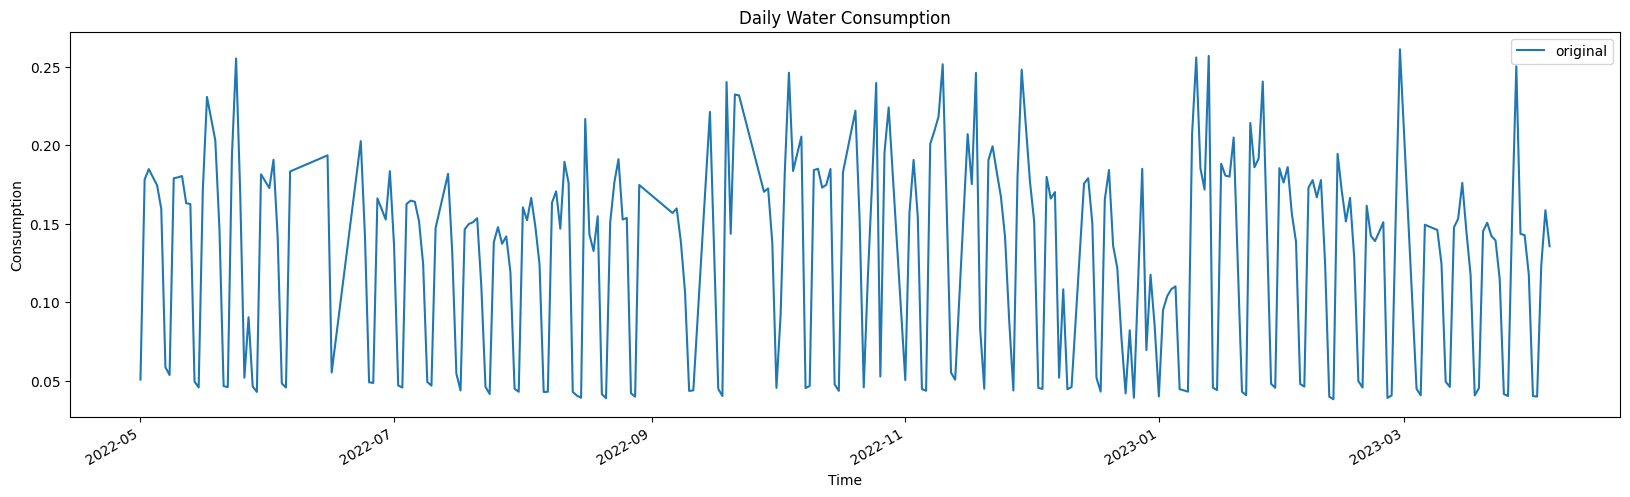

In [136]:
WIDTH = 20
HEIGHT = 5

Q1 = daily_grouped_data.quantile(0.25)
Q3 = daily_grouped_data.quantile(0.75)
IQR = Q3 - Q1
threshold = 0.5
daily_grouped_data = daily_grouped_data[~((daily_grouped_data < (Q1 - threshold * IQR)) | (daily_grouped_data > (Q3 + threshold*IQR))).any(axis=1)]

plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(daily_grouped_data.index, daily_grouped_data[WATER_CONSUMPTION], label="original")
plt.legend(loc="upper right")
plt.title('Daily Water Consumption')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')

# **Preprocessing daily and hourly data**

**Missing Values**

In [137]:
print("Amount of missing vlaues in time series (hourly): {}".format(hourly_grouped_data[WATER_CONSUMPTION].isna().sum()))

Amount of missing vlaues in time series (hourly): 0


In [138]:
print("Amount of missing vlaues in time series (daily): {}".format(daily_grouped_data[WATER_CONSUMPTION].isna().sum()))

Amount of missing vlaues in time series (daily): 0


**Missing Value Interpolation**

In [139]:
daily_grouped_data[WATER_CONSUMPTION] = daily_grouped_data[WATER_CONSUMPTION].interpolate('time')

In [140]:
hourly_grouped_data[WATER_CONSUMPTION] = hourly_grouped_data[WATER_CONSUMPTION].interpolate('time')

**Split Data**

In [141]:
train_size_hourly = int(len(hourly_grouped_data) * 0.8)
train_data_hourly, test_data_hourly = hourly_grouped_data[:train_size_hourly], hourly_grouped_data[train_size_hourly:]

train_size_daily = int(len(daily_grouped_data) * 0.8)
train_data_daily, test_data_daily = daily_grouped_data[:train_size_daily], daily_grouped_data[train_size_daily:]

**Normalize Data**

In [142]:
# Normalize data
scaler_hourly = MinMaxScaler()
train_data_hourly = scaler_hourly.fit_transform(train_data_hourly)
test_data_hourly = scaler_hourly.transform(test_data_hourly)

scaler_daily = MinMaxScaler()
train_data_daily = scaler_daily.fit_transform(train_data_daily)
test_data_daily = scaler_daily.transform(test_data_daily)

# **Prediction**

**Hourly Water Consumption - Random Forest - 1 Timestep into future**

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best Parameters:  {'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 100}


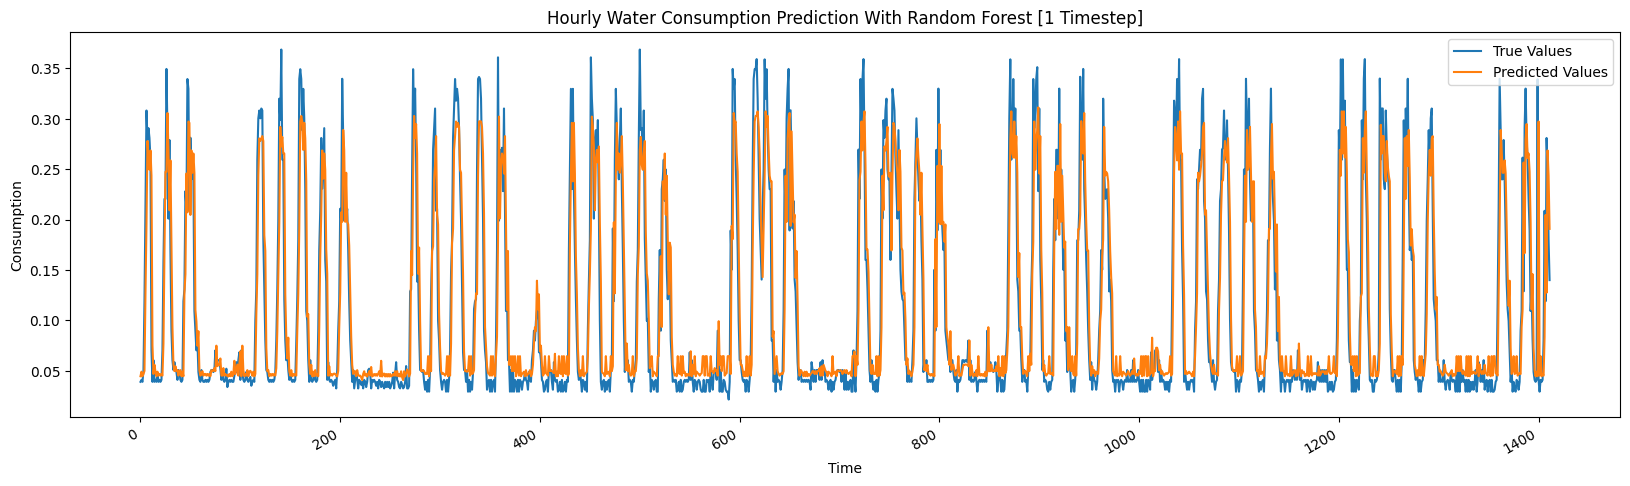

-------------------------------------------------------------------------------------------------------------------------
Test Score
R2:  0.7854110846117286
MSE:  0.002072589551710965
RMSE:  0.045525702100143
-------------------------------------------------------------------------------------------------------------------------


In [143]:
X_train, y_train = train_data_hourly[:-1], train_data_hourly[1:].ravel()
X_test, y_test = test_data_hourly[:-1], test_data_hourly[1:].ravel()


parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [50, 100, 150],
    'min_samples_split': [10, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

model = RandomForestRegressor(verbose=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters: ",grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Inverse transform the data back to its original scale
y_test = scaler_hourly.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_hourly.inverse_transform(y_pred.reshape(-1, 1))


# Plot the true values vs. predicted values
WIDTH = 20
HEIGHT = 5
plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend(loc="upper right")
plt.title('Hourly Water Consumption Prediction With Random Forest [1 Timestep]')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()


# Print the R2 score, MSE, and RMSE
print("-------------------------------------------------------------------------------------------------------------------------")
print("Test Score")
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-------------------------------------------------------------------------------------------------------------------------")

**Daily Water Consumption - Random Forest - 1 Timestep into future**

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Best Parameters:  {'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


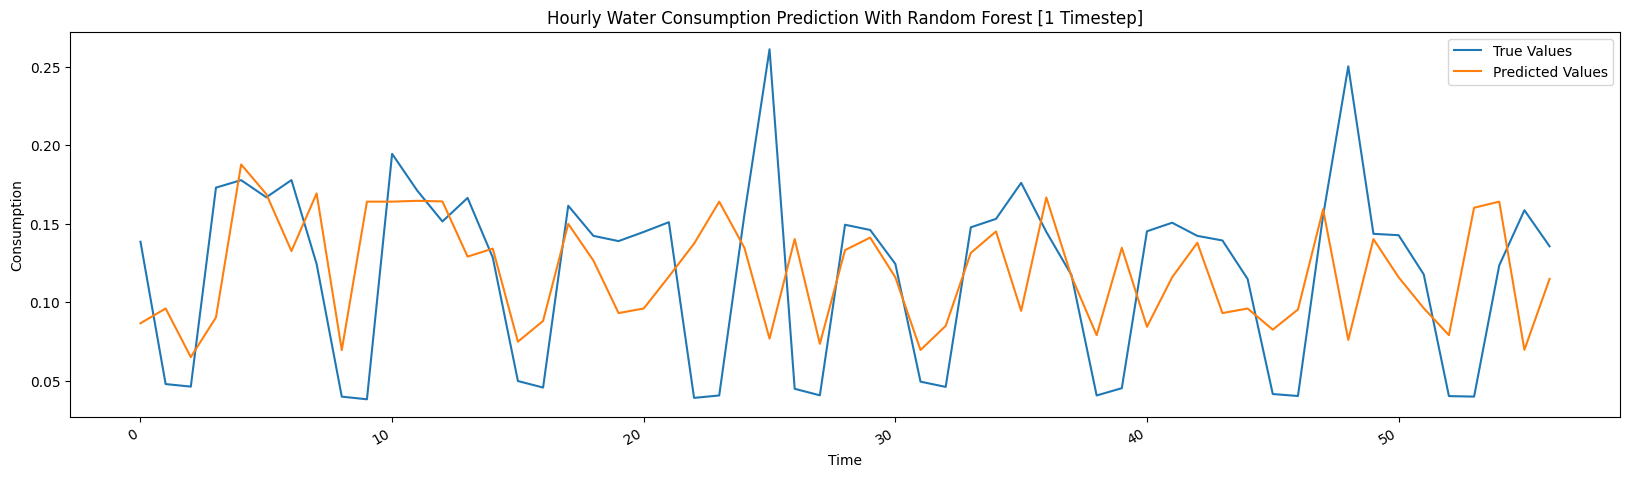

-------------------------------------------------------------------------------------------------------------------------
Test Score
R2:  -0.08863713961954178
MSE:  0.0035505097543832333
RMSE:  0.05958615404926914
-------------------------------------------------------------------------------------------------------------------------


In [144]:
X_train, y_train = train_data_daily[:-1], train_data_daily[1:].ravel()
X_test, y_test = test_data_daily[:-1], test_data_daily[1:].ravel()


parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

model = RandomForestRegressor(verbose=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters: ",grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Inverse transform the data back to its original scale
y_test = scaler_daily.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_daily.inverse_transform(y_pred.reshape(-1, 1))


# Plot the true values vs. predicted values
WIDTH = 20
HEIGHT = 5
plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend(loc="upper right")
plt.title('Hourly Water Consumption Prediction With Random Forest [1 Timestep]')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()


# Print the R2 score, MSE, and RMSE
print("-------------------------------------------------------------------------------------------------------------------------")
print("Test Score")
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-------------------------------------------------------------------------------------------------------------------------")

# Feature Engineering

**Hourly Data Prediction**

In [145]:
import holidays

austrian_holidays = holidays.Austria()


hourly_grouped_data['Day'] = hourly_grouped_data.index.day
hourly_grouped_data['Time'] = hourly_grouped_data.index.hour + (hourly_grouped_data.index.minute / 60)

hourly_grouped_data['Weekday'] = hourly_grouped_data.index.weekday
hourly_grouped_data['Holiday'] = [int(x in austrian_holidays) for x in hourly_grouped_data.index.date]

# Display the resulting dataframe
print(hourly_grouped_data.head())


                     Water Consumption  Day  Time  Weekday  Holiday
Hourly                                                             
2022-05-01 00:00:00             0.0508    1   0.0        6        1
2022-05-01 01:00:00             0.0488    1   1.0        6        1
2022-05-01 02:00:00             0.0508    1   2.0        6        1
2022-05-01 03:00:00             0.0391    1   3.0        6        1
2022-05-01 04:00:00             0.0508    1   4.0        6        1


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.1s finished


Best Parameters:  {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 250}


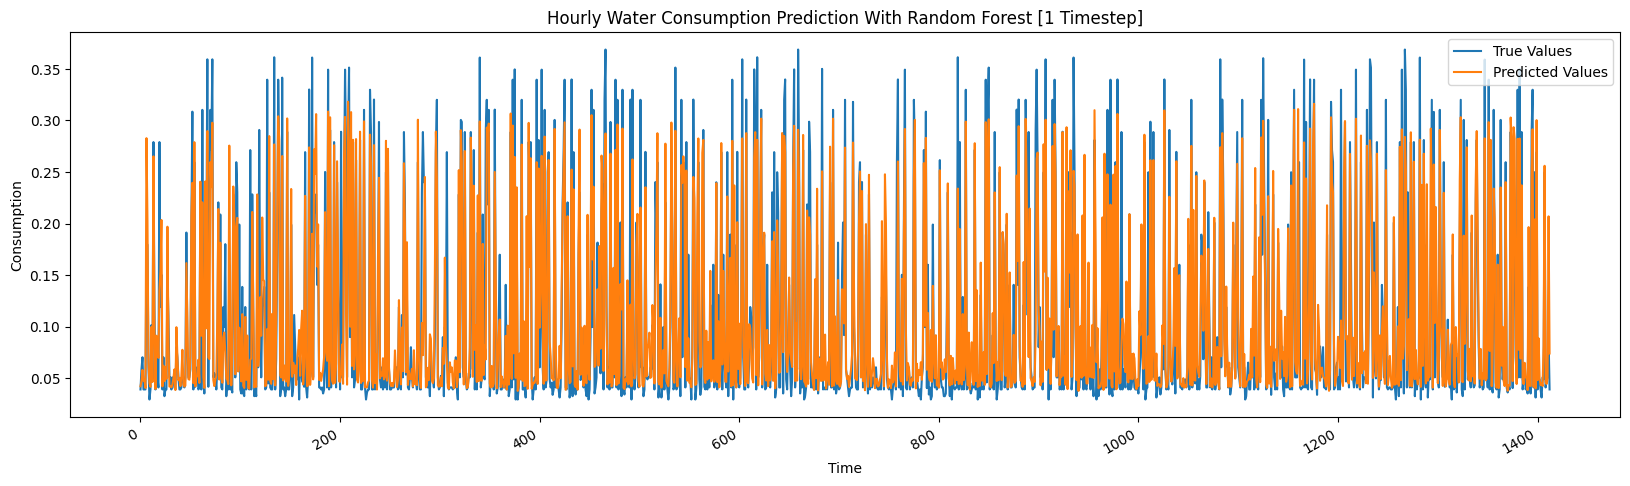

-------------------------------------------------------------------------------------------------------------------------
Test Score
R2:  0.8400396004763653
MSE:  0.0015758865280738573
RMSE:  0.039697437298569505
-------------------------------------------------------------------------------------------------------------------------


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hourly_grouped_data.drop(WATER_CONSUMPTION, axis=1), hourly_grouped_data[WATER_CONSUMPTION], test_size=0.2)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))


parameters = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 50, 100],
    'min_samples_split': [10, 50, 100],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestRegressor(verbose=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.ravel())

print("Best Parameters: ",grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


# Inverse transform the data back to its original scale
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))


# Plot the true values vs. predicted values
WIDTH = 20
HEIGHT = 5
plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend(loc="upper right")
plt.title('Hourly Water Consumption Prediction With Random Forest [1 Timestep]')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()


# Print the R2 score, MSE, and RMSE
print("-------------------------------------------------------------------------------------------------------------------------")
print("Test Score")
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-------------------------------------------------------------------------------------------------------------------------")

**Daily Data Prediction**

In [147]:
import holidays

austrian_holidays = holidays.Austria()


daily_grouped_data['Day'] = daily_grouped_data.index.day
daily_grouped_data['Time'] = daily_grouped_data.index.hour + (daily_grouped_data.index.minute / 60)

daily_grouped_data['Weekday'] = daily_grouped_data.index.weekday
daily_grouped_data['Holiday'] = [int(x in austrian_holidays) for x in daily_grouped_data.index.date]

# Display the resulting dataframe
print(daily_grouped_data.head())

            Water Consumption  Day  Time  Weekday  Holiday
Daily                                                     
2022-05-01           0.050867    1   0.0        6        1
2022-05-02           0.178312    2   0.0        0        0
2022-05-03           0.184904    3   0.0        1        0
2022-05-05           0.174529    5   0.0        3        0
2022-05-06           0.159592    6   0.0        4        0


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


Best Parameters:  {'max_depth': 150, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


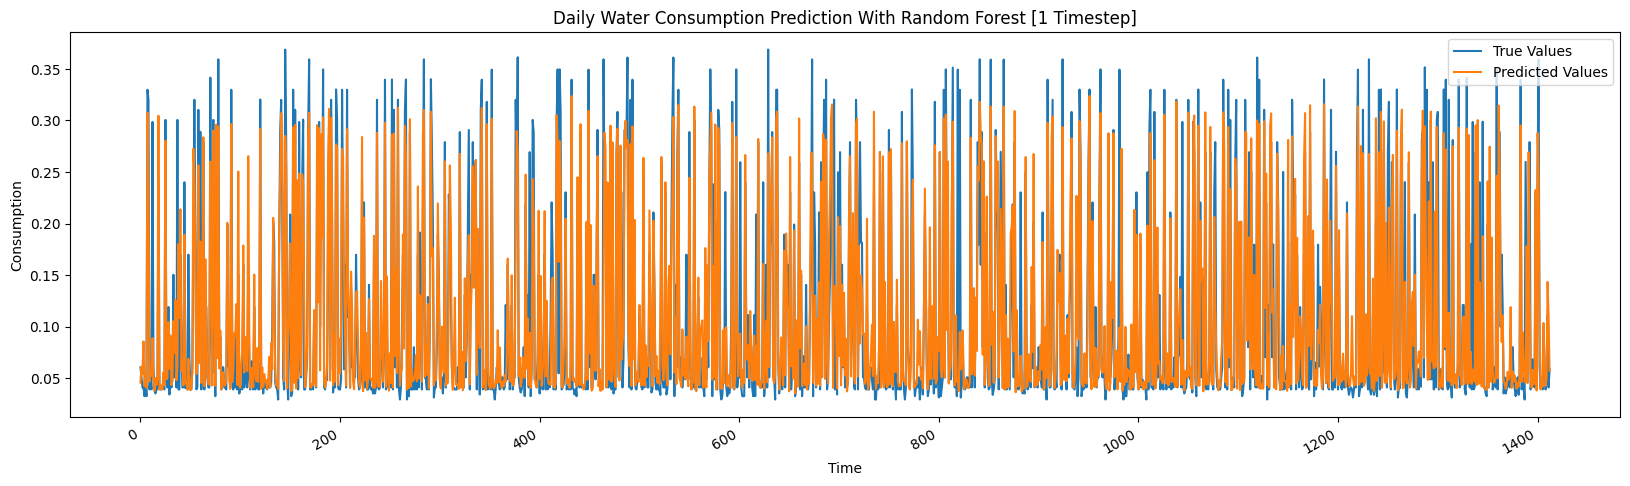

-------------------------------------------------------------------------------------------------------------------------
Test Score
R2:  0.8160736377930239
MSE:  0.0018223514068100113
RMSE:  0.04268900803263073
-------------------------------------------------------------------------------------------------------------------------


In [148]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(hourly_grouped_data.drop(WATER_CONSUMPTION, axis=1), hourly_grouped_data[WATER_CONSUMPTION], test_size=0.2)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))


parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

model = RandomForestRegressor(verbose=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.ravel())

print("Best Parameters: ",grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Inverse transform the data back to its original scale
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))


# Plot the true values vs. predicted values
WIDTH = 20
HEIGHT = 5
plt.figure(figsize=(WIDTH, HEIGHT))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend(loc="upper right")
plt.title('Daily Water Consumption Prediction With Random Forest [1 Timestep]')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()


# Print the R2 score, MSE, and RMSE
print("-------------------------------------------------------------------------------------------------------------------------")
print("Test Score")
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-------------------------------------------------------------------------------------------------------------------------")